# Overview

ASCII: It's technique that converting text into a machine-readable format. In NLP task:

* Tokenization is a technique representing data in a low dimensions area.
* Embedding is a technique that representing data(words, sentences, images) as vectors of numbers.


# Evolution of Embeddings

There are many embedding techniques,
* word2vec
* GloVe
* HuggingFace
* OpenAI embeddings


## Term Frequeny(TF)

It measures how frequently a term occurs in a document. It's the simplest metric for assessing the importance of a word woithin a single document.
* $n_t$: number of time term t appears in document d
* $m_d$: total number of terms in the document d

$$TF(t,d)=\frac{n_t}{m_d}$$


## Inverse Document Frequence(IDF)

It asseses the importance of a term across a set of documents or corpus. It helps in identifying ow common or rare a term is across all documents.
* $n_C$: total number of documents in corpus C
* $n_t$: total number of documents containing term t

$$IDF(t,C)=log(\frac{n_C}{n_t})$$

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

# generate with OpenAI ChatGPT
rmit_info = [
    "RMIT University, located in Melbourne, Australia, is renowned for its strong emphasis on technology, design, and enterprise.",
    "The university offers a wide range of undergraduate and postgraduate programs, attracting students from over 100 countries.",
    "RMIT is known for its strong industry connections, providing students with practical experience and opportunities for internships and employment."
]

def compute_tfidf(documents):
    vectorizer = TfidfVectorizer()
    return vectorizer.fit_transform(raw_documents=documents)

result=compute_tfidf(documents=rmit_info)
print(result.toarray())

[[0.         0.15887789 0.         0.26900365 0.         0.
  0.26900365 0.26900365 0.         0.26900365 0.         0.20458421
  0.         0.26900365 0.         0.         0.20458421 0.20458421
  0.         0.26900365 0.26900365 0.         0.         0.26900365
  0.         0.         0.         0.         0.         0.
  0.         0.26900365 0.20458421 0.20458421 0.         0.26900365
  0.         0.         0.20458421 0.         0.        ]
 [0.26256193 0.15507331 0.26256193 0.         0.         0.26256193
  0.         0.         0.         0.         0.         0.
  0.26256193 0.         0.         0.         0.         0.
  0.         0.         0.         0.26256193 0.26256193 0.
  0.         0.26256193 0.26256193 0.         0.26256193 0.
  0.26256193 0.         0.         0.         0.19968512 0.
  0.26256193 0.26256193 0.19968512 0.26256193 0.        ]
 [0.         0.28991415 0.         0.         0.24543366 0.
  0.         0.         0.24543366 0.         0.24543366 0.37331

## Word2Vec

It's a groundbreaking neural network-based technique developed to generate word embeddings, which are dense vector representations of words in a continuous vector space. And it capture ther semantic relationships between words in a way that reflects the actual use and meaning of words within the language.

It utilizes a shallow, two-layer neural network to learn word associations form large text corpora. It's encapsulated in two main training algorithms:
* Continuous Bag of Words(CBOW)
* Skip-Gram

### CBOW

It predicts a target word given a context. The context is **defined** as a window of surrounding words. It takes the context words as input, averages or aggregators their vectors, and uses this combined vector to predict the target word.

### Skip-Gram

It inverts CBOW's logic by using a target word to **predict** the surrounding context words. And for each target word, the model uses its vector to predict the vectors of context words within a certain range.

## CBOW VS Skip-Gram

CBOW is faster and has slightly better accuracy for frequent words, while Skip-Gram is slower but performs better wit infrequent words and with smaller datasets because it provide more training samples per word.


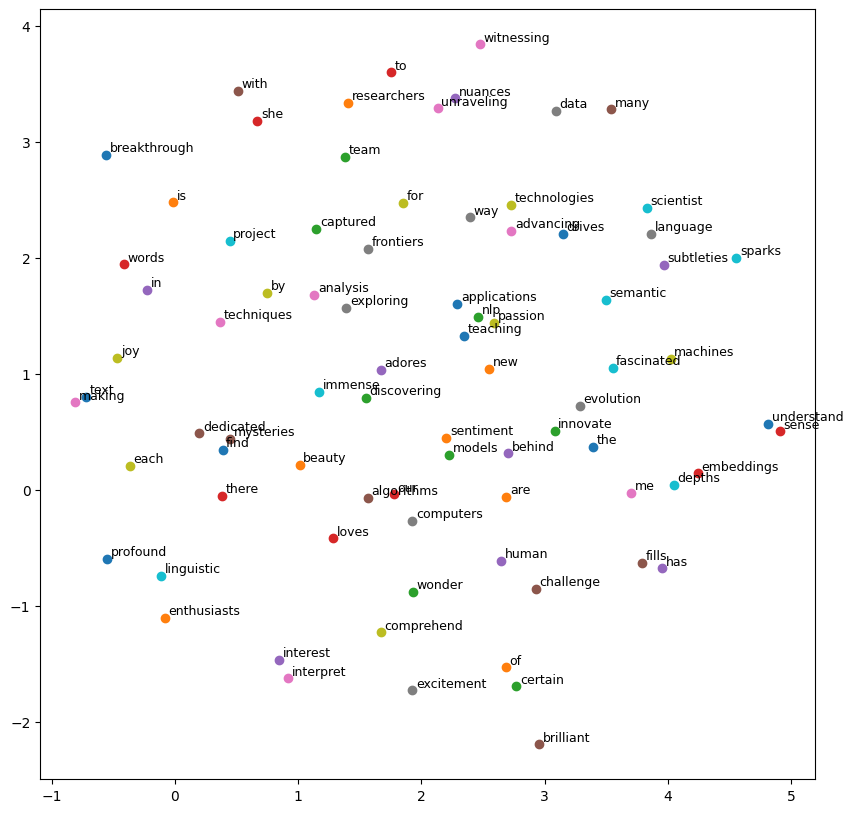

In [2]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def compute(documents):
    processed_docs=[simple_preprocess(document) for document in documents]
    model_cbow=Word2Vec(
        sentences=processed_docs, 
        window=5, 
        vector_size=100,
        workers=5,
        min_count=1,
        sg=0
    )
    model_skip_gram=Word2Vec(
        sentences=processed_docs,
        window=5,
        vector_size=100,
        workers=5,
        min_count=1,
        sg=1
    )
    vector_cbow=model_cbow.wv['language']
    
    vector_skipgram=model_skip_gram.wv['language']
    return model_cbow, model_skip_gram


def visualize(model: Word2Vec):
    word_vectors=model.wv.vectors
    words=model.wv.index_to_key # list words in the model
    
    # t-SNE to reduce word vectors to 2 dimentions for visualization
    # this is like dimensionality reduction, similar to PCA
    tsne=TSNE(n_components=2, random_state=0)
    word_vectors_2d=tsne.fit_transform(word_vectors)
    
    # plotting the 2d word vectors with annotations
    plt.figure(figsize=(10,10))
    for i, word in enumerate(words):
        plt.scatter(word_vectors_2d[i,0], word_vectors_2d[i,1])
        plt.text(word_vectors_2d[i,0]+0.03, word_vectors_2d[i,1]+0.03, word, fontsize=9)
    plt.show()
        
sentences = [
        "The brilliant data scientist loves exploring the depths of NLP techniques.",
        "I find immense joy in unraveling the mysteries behind language models.",
        "NLP enthusiasts are fascinated by the way algorithms understand human language.",
        "There's a certain beauty in teaching machines to interpret the nuances of words.",
        "Discovering new applications for text embeddings fills me with excitement.",
        "The passion for semantic analysis drives researchers to innovate.",
        "She adores the challenge of making computers comprehend linguistic subtleties.",
        "Our team is dedicated to advancing the frontiers of NLP with each project.",
        "The breakthrough in sentiment analysis has captured the interest of many.",
        "Witnessing the evolution of NLP technologies sparks a profound sense of wonder."
    ]

cbow_model, skip_gram_model=compute(documents=sentences)
visualize(cbow_model)

## Global Vectors for Word Representation(GloVe)

It is an unsupervised learning model for generating word vector representations. And it considers both the word co-occurrence counts and the ratios of these counts to uncover semantic relationships between words, enabling it to capture both local and global linguistic statistics within a single framework.

It key features inlucde the ability to identify semantic relationships through the **analysis of co-occurence probabilities**, a hybrid approach combining global matrix factorization with local context window methods for **comprehensive word representation** and **scalability to accomodate large corpora** and **extensive vocabularies**, making it ideal for analysizing web-scale datasets.

In [3]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file='/kaggle/input/glove6b100dtxt/glove.6B.100d.txt'

word2vec_output_file='glove.6B.100d.word2vec.txt'

glove2word2vec(glove_input_file, word2vec_output_file)

model=KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

word_vector=model['language']
print(word_vector)

print(model.most_similar('language'))

/tmp/ipykernel_19/2640251290.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


[ 0.18519   0.34111   0.36097   0.27093  -0.031335  0.83923  -0.50534
 -0.80062   0.40695   0.82488  -0.98239  -0.6354   -0.21382   0.079889
 -0.29557   0.17075   0.17479  -0.74214  -0.2677    0.21074  -0.41795
  0.027713  0.71123   0.2063   -0.12266  -0.80088   0.22942   0.041037
 -0.56901   0.097472 -0.59139   1.0524   -0.66803  -0.70471   0.69757
 -0.11137  -0.27816   0.047361  0.020305 -0.184    -1.0254    0.11297
 -0.79547   0.41642  -0.2508   -0.3188    0.37044  -0.26873  -0.36185
 -0.096621 -0.029956  0.67308   0.53102   0.62816  -0.11507  -1.5524
 -0.30628  -0.4253    1.8887    0.3247    0.60202   0.81163  -0.46029
 -1.4061    0.80229   0.2019    0.60938   0.063545  0.21925  -0.043372
 -0.36648   0.61308   1.0207   -0.39014   0.1717    0.61272  -0.80342
  0.71295  -1.0938   -0.50546  -0.99668  -1.6701   -0.31804  -0.62934
 -2.0226    0.79405  -0.16994  -0.37627   0.57998   0.16643   0.1356
  0.0943   -0.24154   0.7123   -0.4201    0.24735  -0.94449  -1.0794
  0.3413    0.34704 

# Acknowledge

* https://blog.stackademic.com/understanding-text-through-embeddings-a-journey-from-tf-idf-to-glove-and-openai-2570dfe59bf6
* https://platform.openai.com/docs/guides/embeddings